# Session 7: Decision Trees


Instruction for using Colab: [Here](https://www.tutorialspoint.com/google_colab/google_colab_quick_guide.htm)

## Motivation for Decision Trees

1. Handling of categorical variables.
2. Handling of missing values and unknown values.
3. Detection of non-linear relationships.
4. Visualization and interpretation in decision trees.

## Regression Trees

### Toy Example (One Feature)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pydotplus
from IPython.display import Image  

In [ ]:
dataset = np.array( 
[['Asset Flip', 100, 1000], 
['Text Based', 500, 3000], 
['Visual Novel', 1500, 5000], 
['2D Pixel Art', 3500, 8000], 
['2D Vector Art', 5000, 6500], 
['Strategy', 6000, 7000], 
['First Person Shooter', 8000, 15000], 
['Simulator', 9500, 20000], 
['Racing', 12000, 21000], 
['RPG', 14000, 25000], 
['Sandbox', 15500, 27000], 
['Open-World', 16500, 30000], 
['MMOFPS', 25000, 52000], 
['MMORPG', 30000, 80000] 
]) 

video_games = pd.DataFrame(data=dataset, columns=['Type','Cost','Profit'])

In [ ]:
video_games.head()

,Type,Cost,Profit
0,Asset Flip,100,1000
1,Text Based,500,3000
2,Visual Novel,1500,5000
3,2D Pixel Art,3500,8000
4,2D Vector Art,5000,6500


In [ ]:
video_games.dtypes

Type      object
Cost      object
Profit    object
dtype: object

In [ ]:
X = dataset[:, 1:2].astype(int) 

In [ ]:
X

array([[  100],
       [  500],
       [ 1500],
       [ 3500],
       [ 5000],
       [ 6000],
       [ 8000],
       [ 9500],
       [12000],
       [14000],
       [15500],
       [16500],
       [25000],
       [30000]])

In [ ]:
y = dataset[:, 2].astype(int) 

In [ ]:
y

array([ 1000,  3000,  5000,  8000,  6500,  7000, 15000, 20000, 21000,
       25000, 27000, 30000, 52000, 80000])

In [ ]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X, y) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
# Predicting a new value , like 3750 
y_pred = regressor.predict(np.array([[3750]])) 
  
# Print the predicted price 
print("Predicted price: % d\n"% y_pred) 

Predicted price:  8000



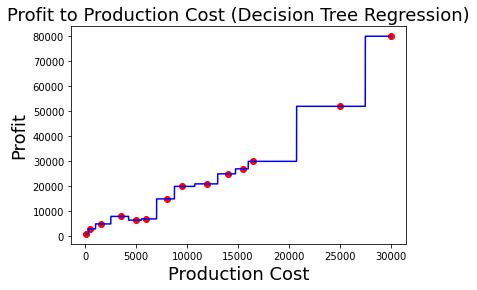

In [ ]:
# Arange for creating a range of values from min value of X to max value of X  
# with a difference of 0.01 between two consecutive values. 
X_grid = np.arange(min(X), max(X), 0.01) 
  
# Reshape for reshaping the data into a len(X_grid)*1 array, i.e. to make a column out of the X_grid values 
X_grid = X_grid.reshape((len(X_grid), 1))  
  
# Scatter plot for original data 
plt.scatter(X, y, color = 'red') 
  
# plot predicted data 
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')  
  
# specify title 
plt.title('Profit to Production Cost (Decision Tree Regression)', fontsize=18)  
  
# specify X axis label 
plt.xlabel('Production Cost', fontsize=18) 
  
# specify Y axis label 
plt.ylabel('Profit', fontsize=18) 
  
# show the plot 
plt.show() 

In [ ]:
# import export_graphviz 
from sklearn.tree import export_graphviz  
  
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(regressor, out_file ='tree_video_games.dot', 
               feature_names =['Production Cost'])

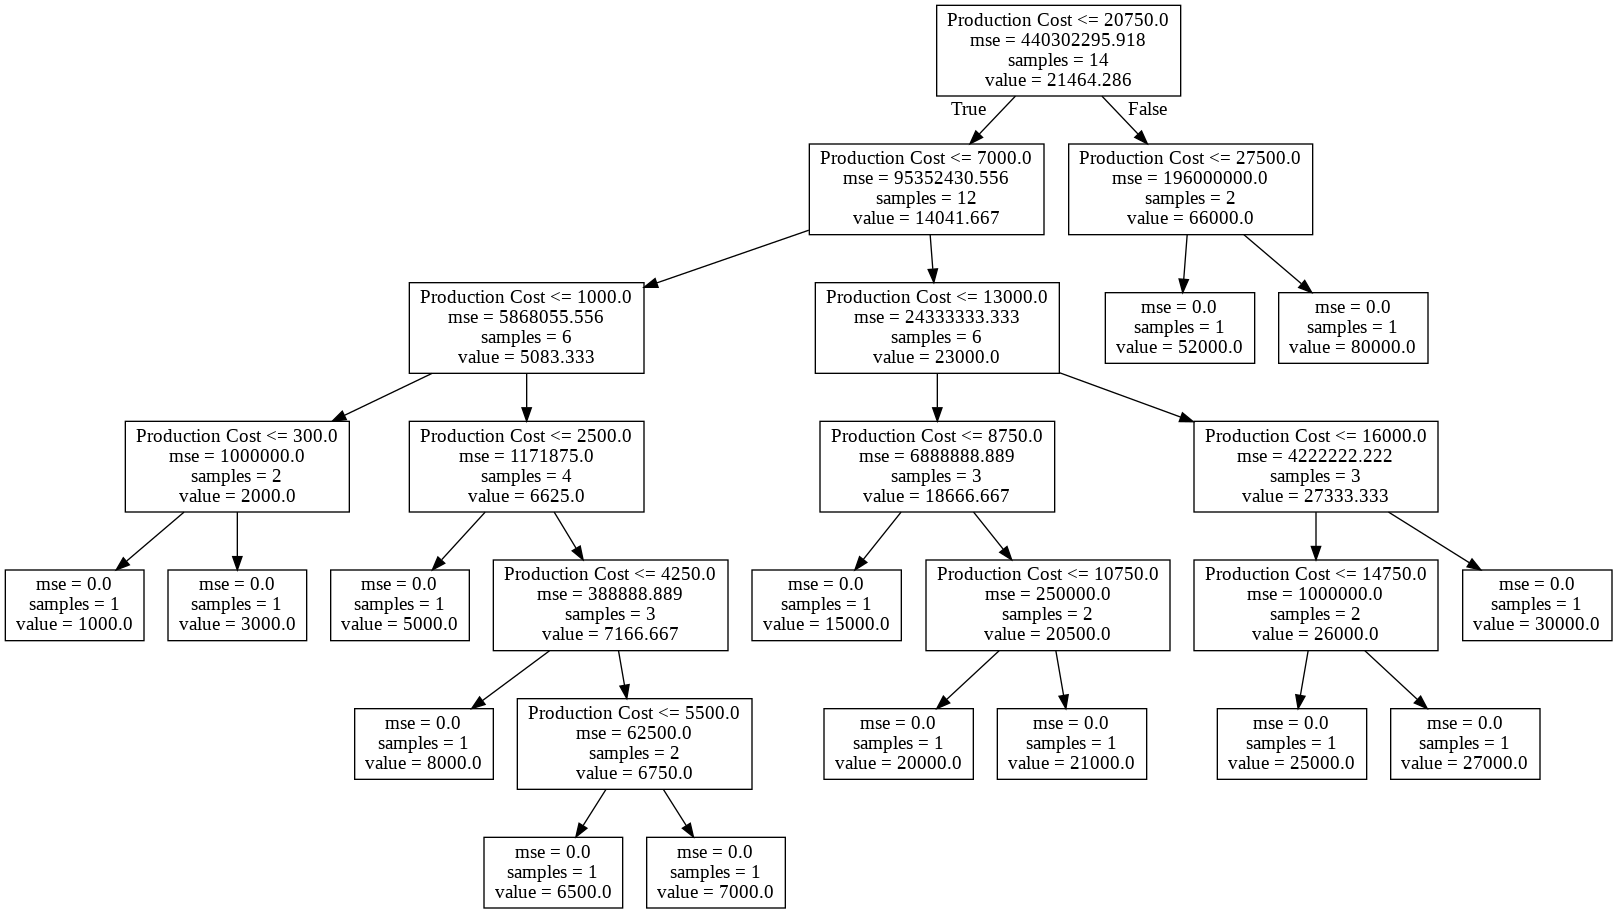

In [ ]:
# Create DOT data
dot_data = export_graphviz(regressor, out_file = None, 
               feature_names =['Production Cost'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

### Coatine data (Multiple Features) 

Let's analyze an example involving second hand smoke exposure in children. 

Cotinine is a metabolite of nicotine, and is found in elevated levels in people exposed to second-hand smoke. Measurement of cotinine requires lab tests, which cost time and money. One easier way is to simply ask parents about the extent of second hand smoke that their children are exposed to – but how accurate are their answers? Can we trust them?

To assess the correspondence (or lack thereof) between
self-reported exposure and cotinine levels, the following variables
were recorded:

1. SmokerTime: Time spent with smokers (Daily/Intermittent/None)
2. TSHours: Hours/day spent with a smoker
3. Nsmokers: Number of smokers who live in the household
4. PPD: Packs per day smoked by the household
5. PctOut: Percentage of time spent smoking that is done outdoors
6. SHS: Self-reported second-hand smoke exposure (None/Mild/Moderate/Heavy)

In [ ]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# Using our Colab traditional method (Part 1)
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# Using our Colab traditional method (Part 2)
# cotinine_data = pd.read_csv('shs.csv')
cotinine_data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQq6oaZC65U3PQmHsMQraeO5RytnVcNqkgtJyA46-tbXwXwXSPOrR7wZQO7X1eyUTvWNGm1stAMa9GZ/pub?gid=2093785930&single=true&output=csv')

In [ ]:
# WARNING: DO NOT TRY TO RUN THIS CODE IF THE TWO LAST CODE CELLS WORKED
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# WARNING: DO NOT TRY TO RUN THIS CODE IF THE TWO LAST CODE CELLS WORKED
# path_shs = "/content/drive/My Drive/McGill/session_7/shs.csv"
# cotinine_data = pd.read_csv(path_shs)

In [ ]:
cotinine_data.head()

,Cotinine,SmokerTime,TSHours,Nsmokers,PPD,PctOut,SHS
0,0.00,Intermittent,2.0,1.0,1.5,0,Mild
1,0.93,None,0.0,0.0,0.0,100,None
2,0.00,None,0.0,0.0,0.0,100,None
3,2.67,Daily,1.5,1.0,1.5,0,Mild
4,1.46,Daily,12.0,2.0,2.0,100,Moderate


In [ ]:
np.unique(cotinine_data.SHS)

array(['Heavy', 'Mild', 'Moderate', 'None'], dtype=object)

In [ ]:
one_hot_data = pd.get_dummies(cotinine_data[['SmokerTime','SHS']],drop_first=True)

In [ ]:
one_hot_data.head()

,SmokerTime_Intermittent,SmokerTime_None,SHS_Mild,SHS_Moderate,SHS_None
0,1,0,1,0,0
1,0,1,0,0,1
2,0,1,0,0,1
3,0,0,1,0,0
4,0,0,0,1,0


In [ ]:
cotinine_data = cotinine_data.drop(columns=['SmokerTime','SHS'])

In [ ]:
cotinine_data_clean = pd.concat([cotinine_data, one_hot_data], axis=1, sort=False)

In [ ]:
cotinine_data_clean.head()

,Cotinine,TSHours,Nsmokers,PPD,PctOut,SmokerTime_Intermittent,SmokerTime_None,SHS_Mild,SHS_Moderate,SHS_None
0,0.00,2.0,1.0,1.5,0,1,0,1,0,0
1,0.93,0.0,0.0,0.0,100,0,1,0,0,1
2,0.00,0.0,0.0,0.0,100,0,1,0,0,1
3,2.67,1.5,1.0,1.5,0,0,0,1,0,0
4,1.46,12.0,2.0,2.0,100,0,0,0,1,0


In [ ]:
cotinine_data_clean.shape

(135, 10)

In [ ]:
feature_cols = cotinine_data_clean.columns[1:] 
X = cotinine_data_clean[feature_cols] # Features
y = cotinine_data_clean.Cotinine # Target variable

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X_train, y_train) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
# predicting a new value 
  
# test the output by changing values 
y_pred = regressor.predict(np.array(X_test.iloc[0,:]).reshape(1,-1)) 
  
# print the predicted cotinine level 
print("Predicted cotinine: % d\n"% y_pred)

Predicted cotinine:  1



In [ ]:
# Predict the response for test dataset
y_pred = regressor.predict(X_test)

In [ ]:
# import export_graphviz 
from sklearn.tree import export_graphviz  
  
# Export the decision tree to a tree.dot file for visualizing the plot easily anywhere 
export_graphviz(regressor, out_file ='tree2.dot', 
               feature_names = cotinine_data_clean.columns[1:])

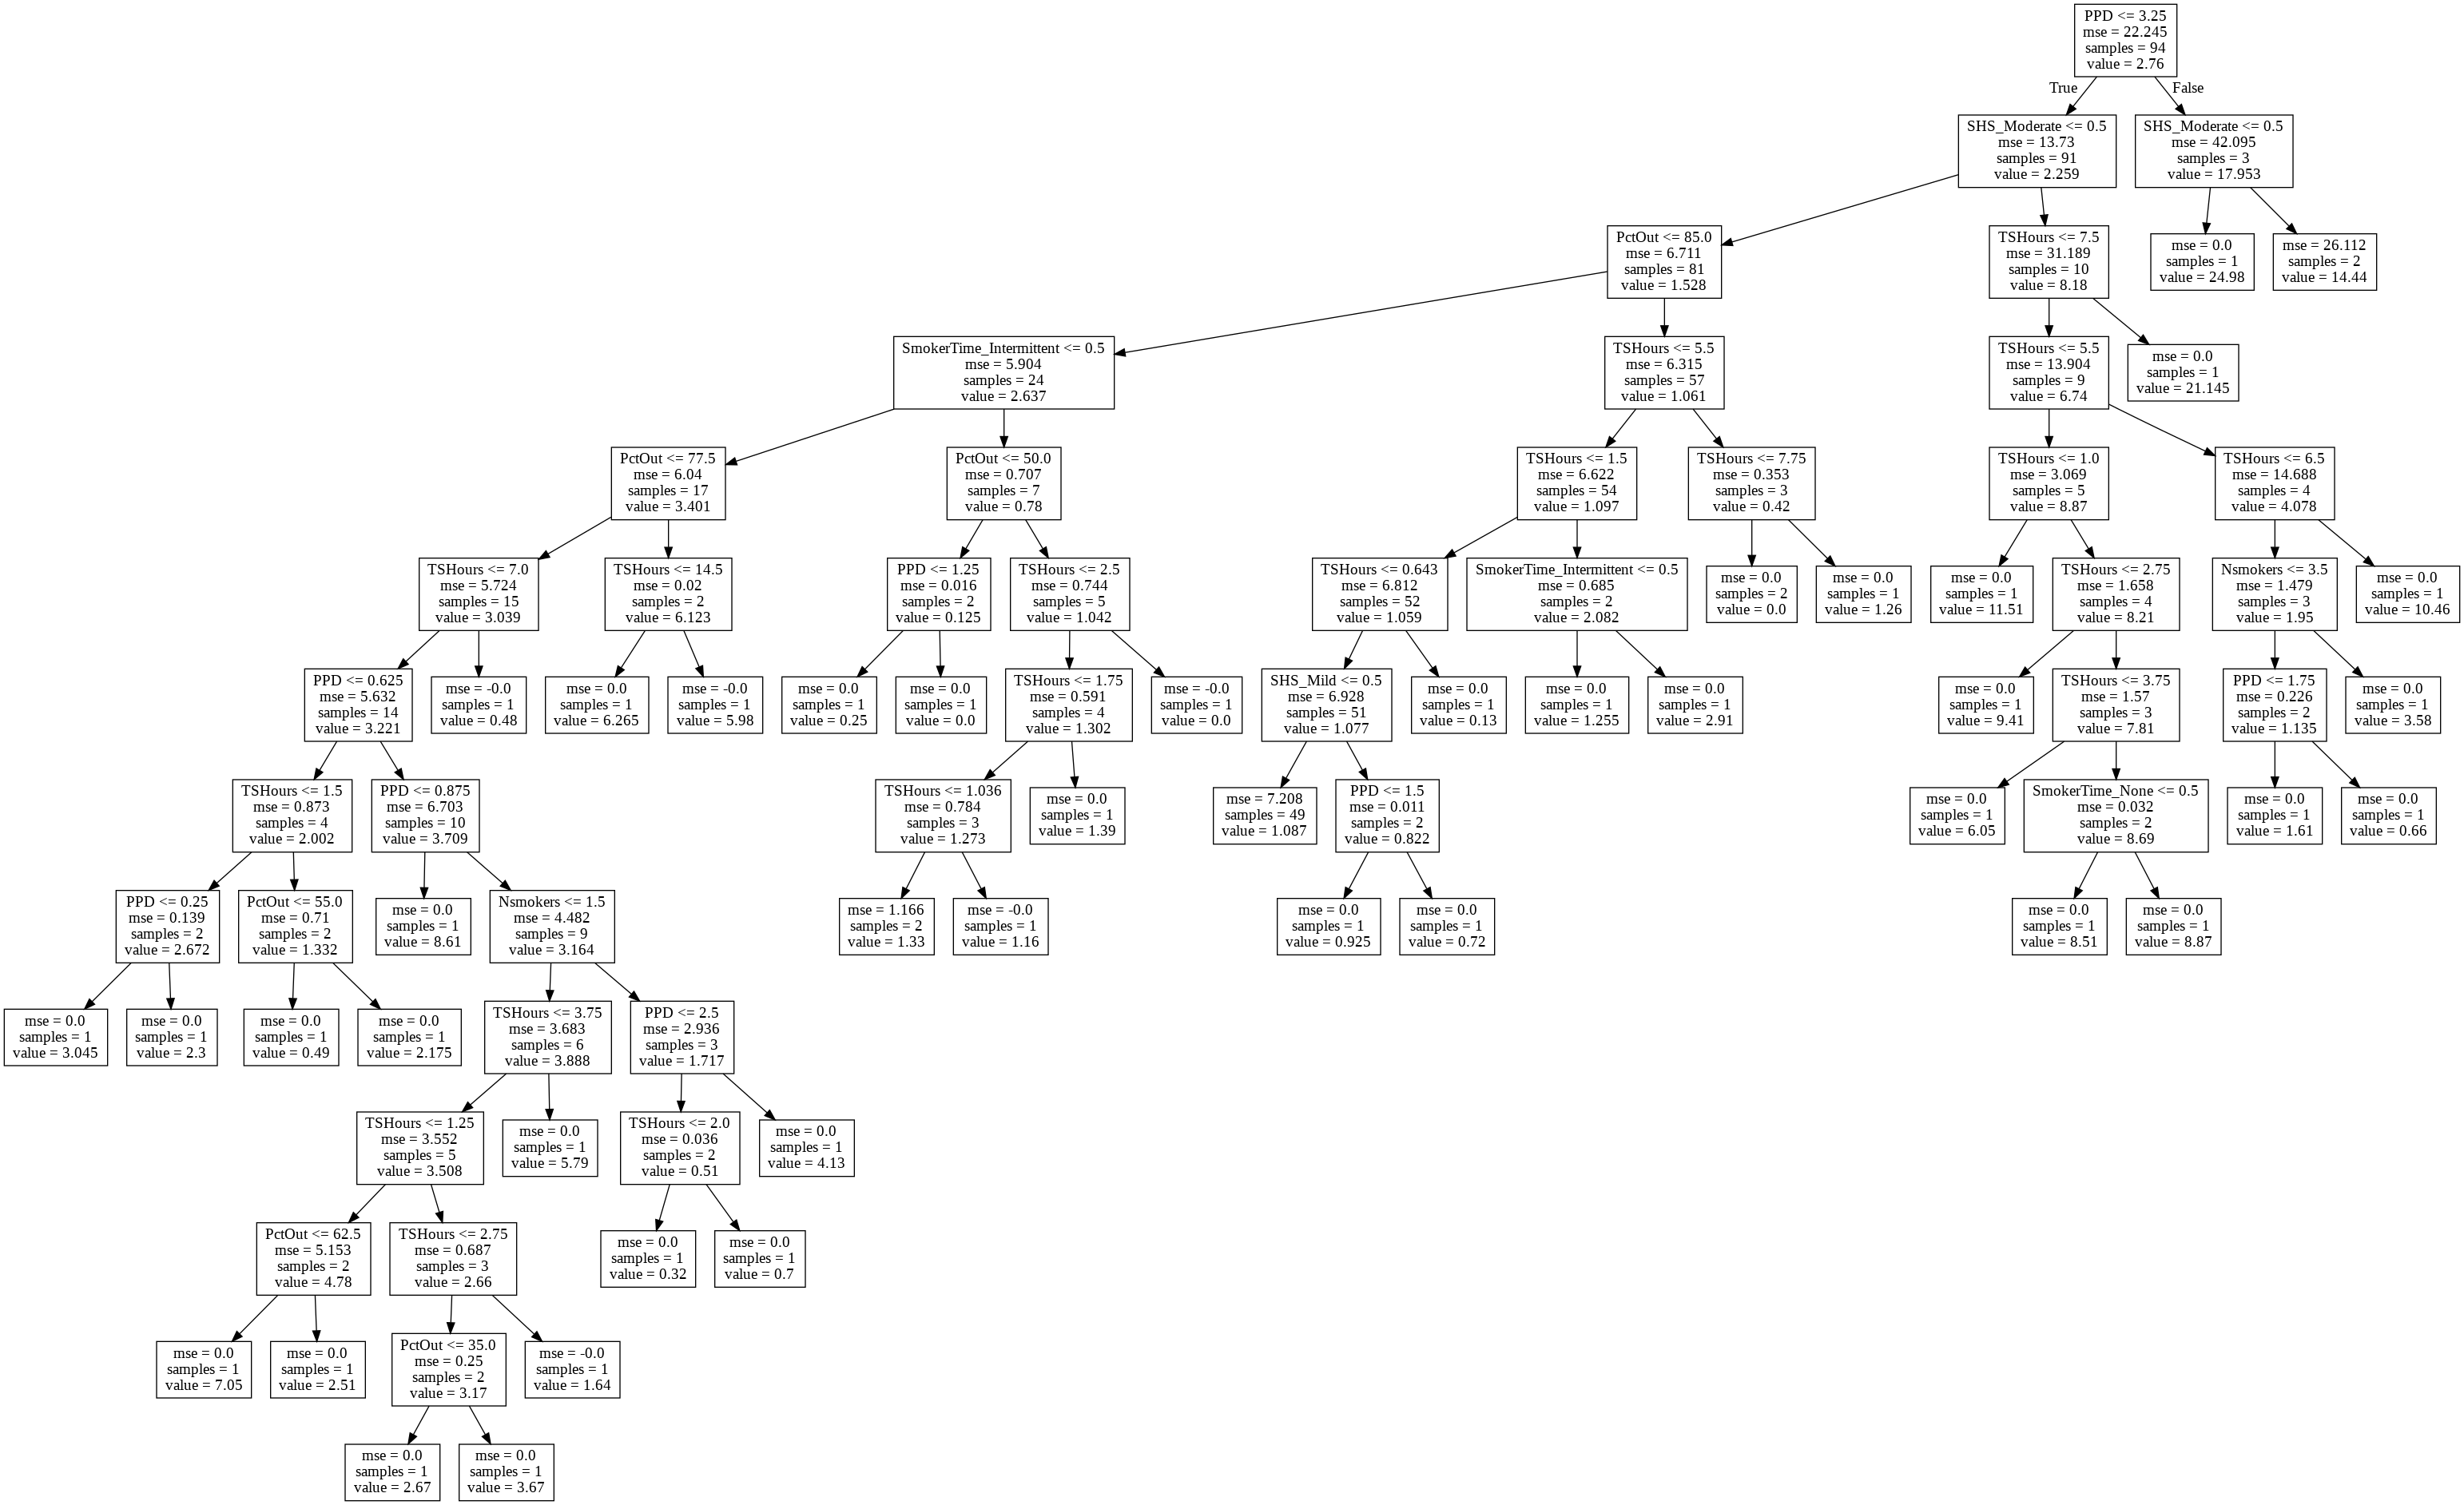

In [ ]:
# Create DOT data
dot_data = export_graphviz(regressor, out_file = None, 
               feature_names =cotinine_data_clean.columns[1:])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

## Classification Trees

### Diabetes Data

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

To assess the correspondence (or lack thereof) between
self-reported exposure and cotinine levels, the following variables
were recorded:

1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSFubekV4eJCKAP63FN2QGO-eEs8GU20yw3uZBkNhrnEorNBerWC_9_k-OBLnZE9US7T-AX9GmnXMah/pub?gid=1985752445&single=true&output=csv')

In [ ]:
# WARNING: DO NOT RUN THIS CODE IF YOU CAN LOAD THE DATA
# path_diabetes = "/content/drive/My Drive/McGill/session_7/diabetes.csv"
# diabetes_data = pd.read_csv(path_diabetes)

In [ ]:
diabetes_data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_data.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [ ]:

X = diabetes_data.loc[:, diabetes_data.columns != 'class']

y = diabetes_data['class'] # Target variable

In [ ]:
#feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
#X = diabetes_data[feature_cols] # Features
#y = diabetes_data.Outcome # Target variable

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

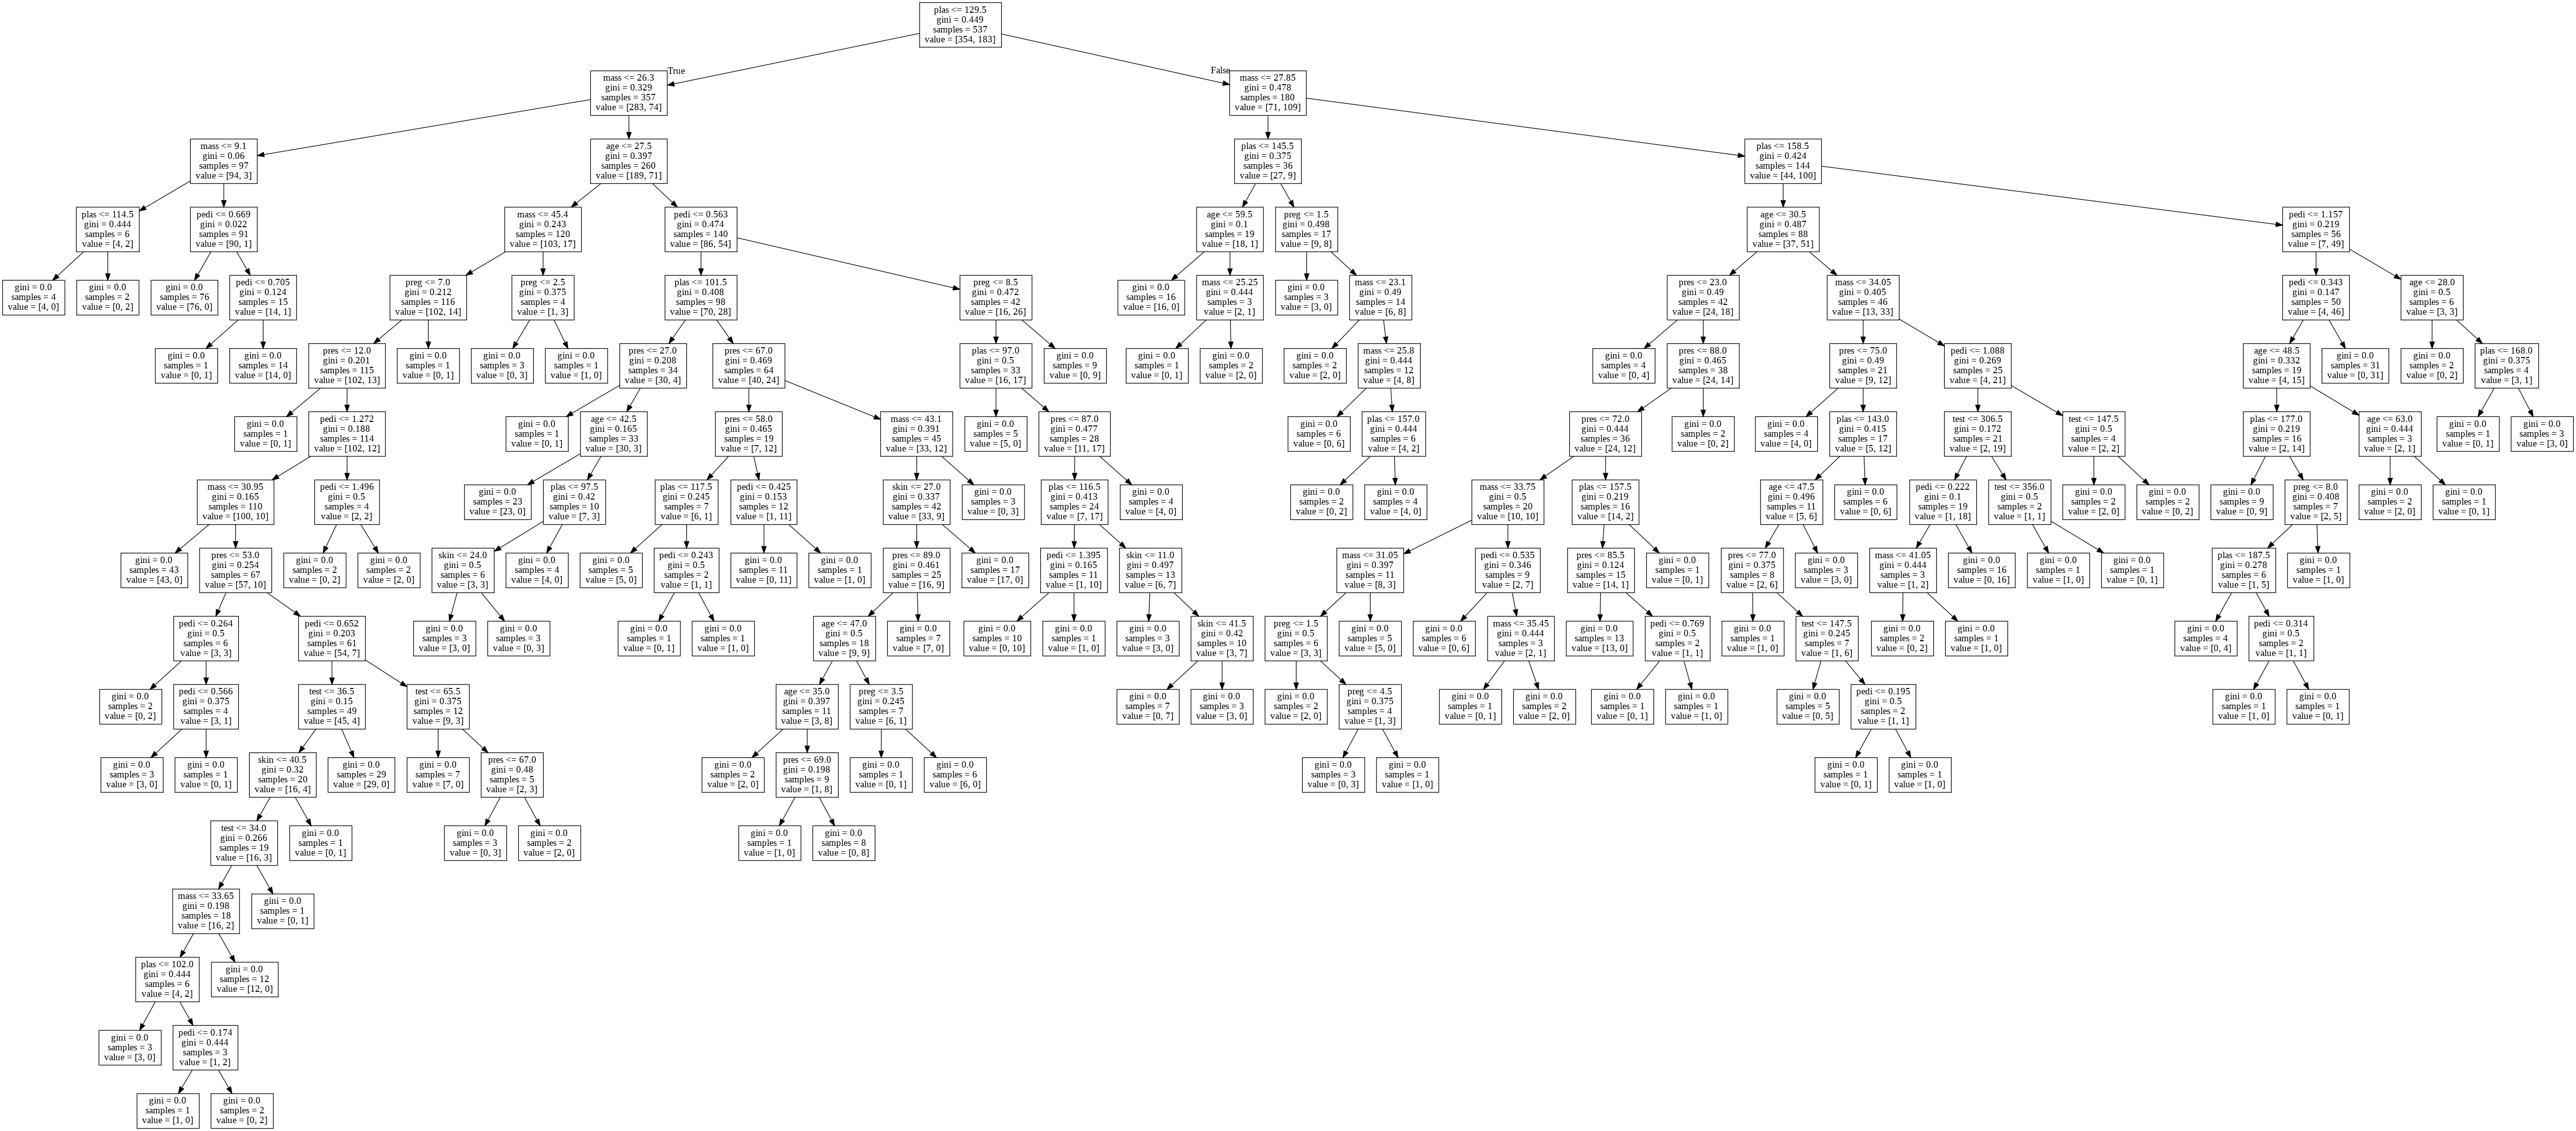

In [ ]:
# Create DOT data
dot_data = export_graphviz(clf, out_file = None, 
               feature_names =X.columns)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

**Parameters:** <br>

`criterion: string, optional (default=”gini”)` <br>
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

`splitter: string, optional (default=”best”)` <br>
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

`max_depth: int or None, optional (default=None)` <br>
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.

`min_samples_split: int, float, optional (default=2)` <br>
The minimum number of samples required to split an internal node:
  + If int, then consider min_samples_split as the minimum number.
  + If float, then `min_samples_split` is a fraction and ceil(`min_samples_split` * `n_samples`) are the minimum number of samples for each split.

`min_samples_leaf : int, float, optional (default=1)` <br>
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
  + If int, then consider `min_samples_leaf` as the minimum number.
  + If float, then `min_samples_leaf` is a fraction and ceil(`min_samples_leaf` * `n_samples`) are the minimum number of samples for each node.

## b) Optimizing Decision Tree Performance

* criterion : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

* splitter : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

* max_depth : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3. 

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

train_acc = []
test_acc = []
for depth in range(25):
    dt = DecisionTreeClassifier(max_depth = depth+1, random_state=depth)
    model = dt.fit(X_train,y_train)
    depth_train_acc = cross_val_score(model, X_train, y_train, cv=5)
    train_acc.append(np.mean(depth_train_acc))
    depth_test_acc = cross_val_score(model, X_test, y_test, cv=5)
    test_acc.append(np.mean(depth_test_acc))

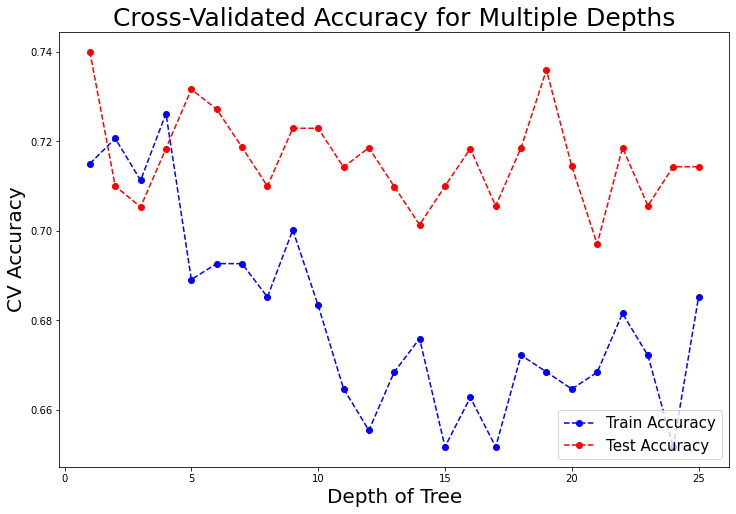

In [ ]:
figuresize = plt.figure(figsize=(12,8))
trainAcc = plt.plot(np.arange(25)+1,train_acc, '--bo')   
testAcc = plt.plot(np.arange(25)+1,test_acc, '--ro')   
legend = plt.legend(['Train Accuracy', 'Test Accuracy'], loc ='lower right',  fontsize=15)
title = plt.title('Cross-Validated Accuracy for Multiple Depths', fontsize=25)
xlab = plt.xlabel('Depth of Tree', fontsize=20)
ylab = plt.ylabel('CV Accuracy', fontsize=20)

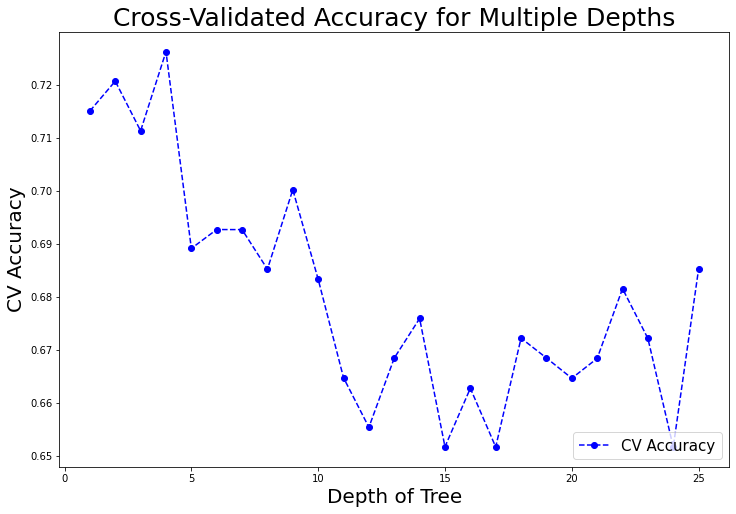

In [ ]:
figuresize = plt.figure(figsize=(12,8))
trainAcc = plt.plot(np.arange(25)+1,train_acc, '--bo')   
# testAcc = plt.plot(np.arange(25)+1,test_acc, '--ro')   
legend = plt.legend(['CV Accuracy'], loc ='lower right',  fontsize=15)
title = plt.title('Cross-Validated Accuracy for Multiple Depths', fontsize=25)
xlab = plt.xlabel('Depth of Tree', fontsize=20)
ylab = plt.ylabel('CV Accuracy', fontsize=20)

In [ ]:
print("The best depth of the trees is ", np.argmax(train_acc)+1, " with accuracy of ", np.amax(train_acc))


The best depth of the trees is  4  with accuracy of  0.7262201453790239


## Additional hyperparameters to tune (For Breakout room)

1.  
```
min_samples_split
```
the minimum number of samples a node must have before it can be split.

2. 
```
min_samples_leaf
``` :the minimum number of samples a leaf node must have.
3. 
```
max_leaf_nodes
```: maximum number of leaf nodes.

### Pros

* Decision trees are easy to interpret and visualize.
* It can easily capture Non-linear patterns.
* It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
* It can be used for feature engineering such as predicting missing values, suitable for variable selection.
* The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm.

### Cons

* Sensitive to noisy data. It can overfit noisy data.
* The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
* Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.

# Breakout Room

1. Load '**wine_255.csv**' dataset on mycourses: mycourses\Content\Data\wine_255.csv
2. You will be working with all the columns in the dataset.

3. Print out the first 10 records and last 5 records/rows of your dataframe.

4. Display some statistics associated with the data.
  * Do you notice something wrong? Fix it.
  * Do you have duplicate entries? Use 

    ```
    pandas - drop_duplicates
    ```
    [documentation - drop_duplicates](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)

  * How many duplicate entries did you notice?

5. After making proper modification, generate stats associated with all the columns.

6. [Optional] Partition data into two parts : train and test (ratio: 80:20).

7. Train a Decision Tree Classifier model with the target variable being: '**quality_category**'

8. Perform k- fold CV for hyperparameter search with following parameters:

  * min_samples_split: 2, 3, 5
  * criterion: 'gini', 'entropy'
  * max_leaf_node: 4, 6, 8

Instead of tuning all hyperparameters, just choose any two and perform search.

* If time permits, check out [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) - for tuning all hyperparameters

